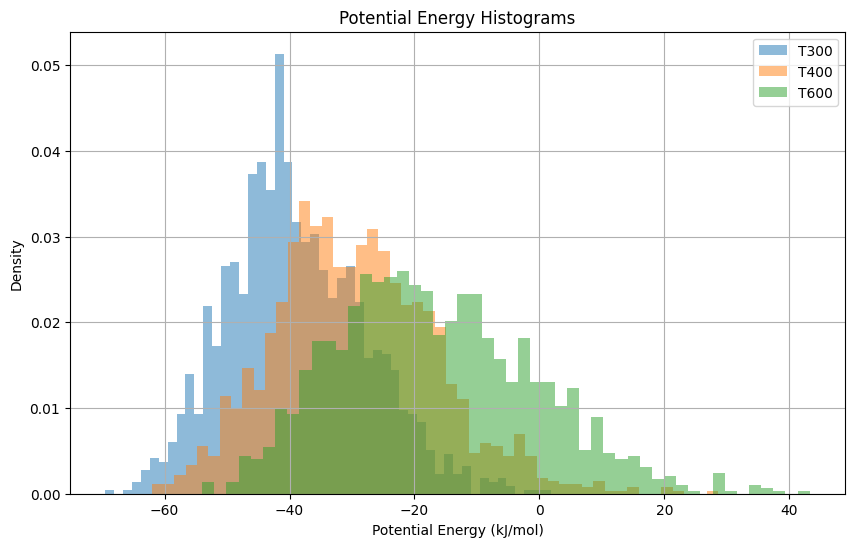

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load potential energy data
def load_energy_data(filename):
    data = np.loadtxt(filename, comments=['#', '@'])
    return data[:, 1]  # Assuming the second column contains the potential energy values

# Load energy data from each replica
energy_T300 = load_energy_data('T300/energy.xvg')
energy_T400 = load_energy_data('T400/energy.xvg')
energy_T600 = load_energy_data('T600/energy.xvg')

# Create histograms
plt.figure(figsize=(10, 6))

plt.hist(energy_T300, bins=50, alpha=0.5, label='T300', density=True)
plt.hist(energy_T400, bins=50, alpha=0.5, label='T400', density=True)
plt.hist(energy_T600, bins=50, alpha=0.5, label='T600', density=True)

plt.title('Potential Energy Histograms')
plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.savefig('potential_energy_histograms.png')
plt.show()


In [2]:
import MDAnalysis as mda

# Load the trajectory
u = mda.Universe('T300/adp.tpr', 'T300/CV_data.xtc')

# Extract desired properties (e.g., distances between certain atoms)
# Adjust the selection based on your system
selection1 = u.select_atoms('resname DOPG and name O')
selection2 = u.select_atoms('resname DOPA and name O')

distances = []

for ts in u.trajectory:
    dist = selection1.positions - selection2.positions  # Calculate distances
    distances.append(np.linalg.norm(dist))  # Get the norm (distance)

# Save to file
np.savetxt('CV_data.xvg', distances)


/ext3/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


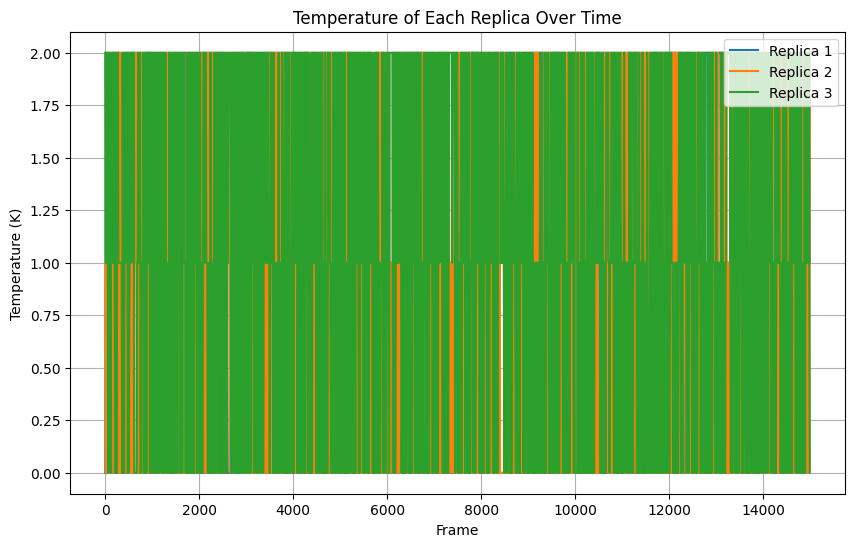

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load replica temperature data
data = np.loadtxt('T300/replica_temp.xvg', comments=['#', '@'])
frames = data[:, 0]  # Frame numbers
temperatures = data[:, 1:]  # Temperature data for each replica

# Select every 100 frames for plotting
skip = 100
frames = frames[::skip]
temperatures = temperatures[::skip]

# Plotting
plt.figure(figsize=(10, 6))
for i in range(temperatures.shape[1]):
    plt.plot(frames, temperatures[:, i], label=f'Replica {i+1}')

plt.title('Temperature of Each Replica Over Time')
plt.xlabel('Frame')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.savefig('replica_temperatures.png')
plt.show()


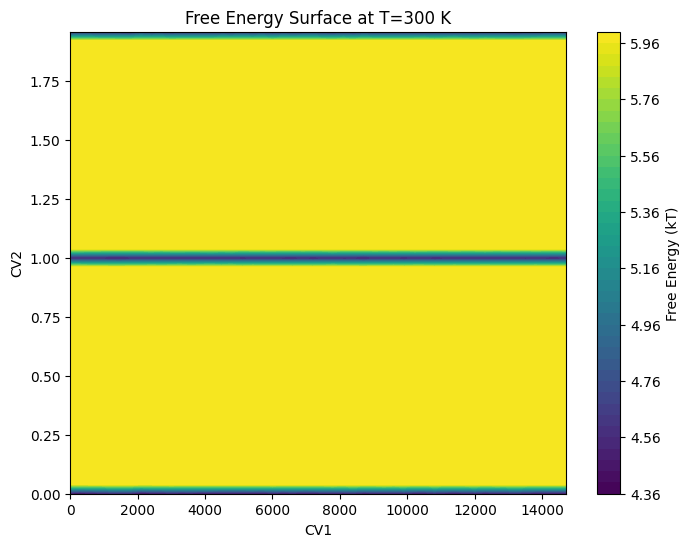

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load CV data
data = np.loadtxt('T300/replica_temp.xvg', comments=['#', '@'])
CV1 = data[:, 0]  # First CV
CV2 = data[:, 1]  # Second CV

# Create 2D histogram
H, xedges, yedges = np.histogram2d(CV1, CV2, bins=50, density=True)

# Convert histogram to free energy
H = np.clip(H, 1e-10, None)  # Avoid log(0)
kT = 0.593  # Adjust this based on your system
F = -kT * np.log(H)  # Free energy in units of kT
F[F > 6] = 6  # Set maximum free energy to 6 kT

# Plot free energy surface
plt.figure(figsize=(8, 6))
plt.contourf(xedges[:-1], yedges[:-1], F.T, levels=50, cmap='viridis')
plt.colorbar(label='Free Energy (kT)')
plt.title('Free Energy Surface at T=300 K')
plt.xlabel('CV1')
plt.ylabel('CV2')
plt.savefig('FES_T300.png')
plt.show()


(1500,)
(1500, 3)


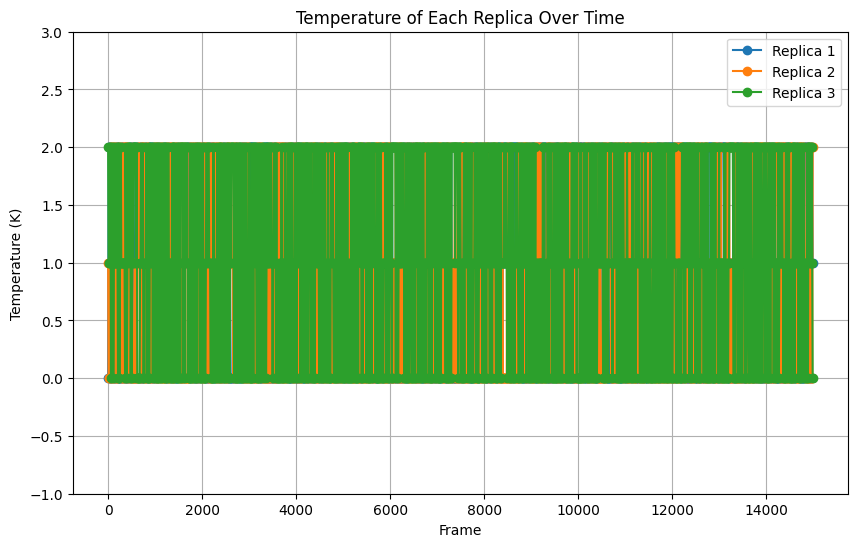

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the replica temperature data
data = np.loadtxt('T300/replica_temp.xvg', comments=['#', '@'])

# The first column is typically the frame number, and the remaining columns are the temperatures
frames = data[:, 0]  # Frame numbers
temperatures = data[:, 1:]  # Temperature data for each replica

# Select every 100 frames
skip = 100
frames = frames[::skip]
temperatures = temperatures[::skip]

# Check the shapes after slicing
print(frames.shape)
print(temperatures.shape)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(temperatures.shape[1]):
    plt.plot(frames, temperatures[:, i], label=f'Replica {i + 1}', marker='o')

plt.title('Temperature of Each Replica Over Time')
plt.xlabel('Frame')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.ylim(-1, 3)  # Adjust y-axis limits based on your data range
plt.savefig('replica_temperatures.png')
plt.show()


Plotting Replica 1: [0. 2. 2. ... 1. 2. 1.]
Plotting Replica 2: [1. 0. 0. ... 0. 0. 2.]
Plotting Replica 3: [2. 1. 1. ... 2. 1. 0.]


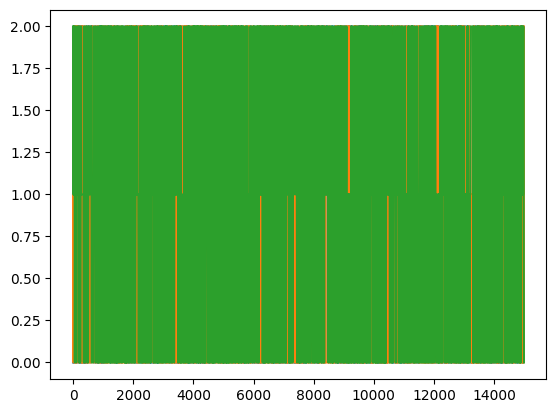

In [3]:
for i in range(temperatures.shape[1]):
    print(f'Plotting Replica {i + 1}: {temperatures[:, i]}')
    plt.plot(frames, temperatures[:, i], label=f'Replica {i + 1}')



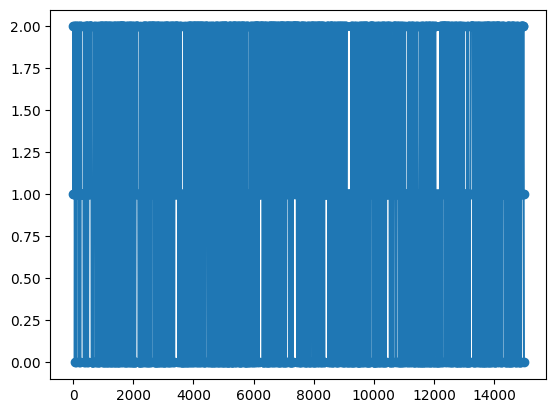

In [4]:
plt.plot(frames, temperatures[:, i], label=f'Replica {i + 1}', marker='o')


(1500,)
(1500, 3)


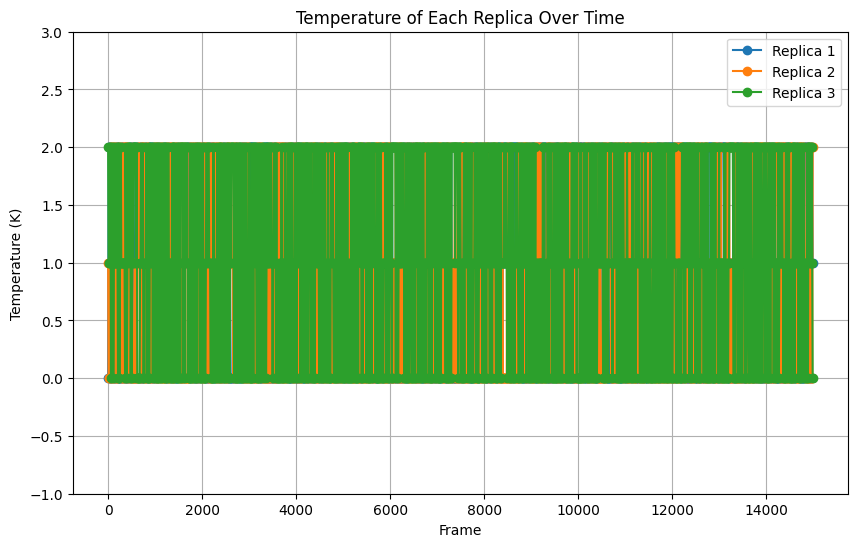

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the replica temperature data
data = np.loadtxt('T300/replica_temp.xvg', comments=['#', '@'])

# The first column is typically the frame number, and the remaining columns are the temperatures
frames = data[:, 0]  # Frame numbers
temperatures = data[:, 1:]  # Temperature data for each replica

# Select every 100 frames
skip = 100
frames = frames[::skip]
temperatures = temperatures[::skip]

# Check the shapes after slicing
print(frames.shape)
print(temperatures.shape)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(temperatures.shape[1]):
    plt.plot(frames, temperatures[:, i], label=f'Replica {i + 1}', marker='o')

plt.title('Temperature of Each Replica Over Time')
plt.xlabel('Frame')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.ylim(-1, 3)  # Adjust y-axis limits based on your data range
plt.savefig('replica_temperatures.png')
plt.show()
